<a href="https://colab.research.google.com/github/napsternxg/ipython-notebooks/blob/master/Graph_Feature_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse.linalg import eigsh
plt.style.use('dark_background')
import pandas as pd

In [ ]:
N = 10
G = nx.barabasi_albert_graph(n=N, m=2)
pos = nx.spring_layout(G)

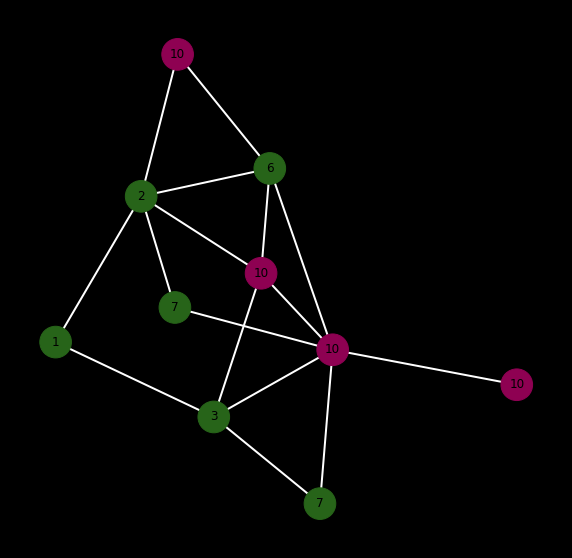

In [ ]:
node_vals = np.random.randint(1, 10, size=(N))
node_mask = np.random.randint(2, size=(N))
default_val = 10
node_vals = np.where(node_mask == 1, node_vals, default_val)

nx.set_node_attributes(G, {i:v for i,v in enumerate(node_vals)}, name="v")
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(
    G, pos, 
    node_size=1000, 
    alpha=1, 
    width=2, 
    ax=ax, 
    edge_color="white", 
    labels={i:v for i,v in enumerate(node_vals)},
    node_color=node_mask,
    cmap="PiYG"
)
fig.set_facecolor('black')

In [ ]:
pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

,v
0,10
1,3
2,3
3,4
4,6
5,10
6,2
7,10
8,7
9,10


In [ ]:
A = nx.convert_matrix.to_numpy_array(G)
D = np.diag(A.sum(axis=-1))
D_hf_inv = np.diag(1/(A.sum(axis=-1)**0.5))
L_norm = D_hf_inv @ (D - A) @ D_hf_inv
# L_norm
A_bar = np.eye(*A.shape) - L_norm
A_bar

array([[ 0.00000000e+00,  2.00000000e-01,  4.47213595e-01,
         1.82574186e-01,  2.23606798e-01,  3.16227766e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         1.82574186e-01,  0.00000000e+00,  3.16227766e-01,
         0.00000000e+00,  3.16227766e-01,  3.16227766e-01,
         0.00000000e+00],
       [ 4.47213595e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.82574186e-01,  1.82574186e-01,  0.00000000e+00,
        -2.22044605e-16,  2.04124145e-01,  0.00000000e+00,
         2.35702260e-01,  2.88675135e-01,  2.88675135e-01,
         0.00000000e+00],
       [ 2.23606798e-01,  0.00000000e+00,  0.00000000e+00,
         2.04124145e-01,  0.00000000e+00,  0.00000000e+00,
         2.88675135e-01,  0.00000000e+00,  0.00000000e+00,
         3.

In [ ]:
D_hf_inv @ D @ D_hf_inv

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
A @ node_vals

array([26., 41., 10., 38., 26., 13., 20.,  7.,  7.,  8.])

In [ ]:
def feature_propogation(node_vals, node_mask, A, n_iters=10, default_val=0):
  node_vals = np.where(node_mask == 1, node_vals, default_val)
  v = node_vals
  iters = [v]
  for i in range(10):
    v = np.where(node_mask == 0, A_bar @ v, v)
    iters.append(v)
    delta = np.linalg.norm(iters[-2] - iters[-1])
    if delta < 1e-5:
      print(f"Delta={delta:.5f} low, breaking at i={i}")
      break
  return iters
iters = feature_propogation(node_vals, node_mask, A, n_iters=10, default_val=0)
pd.DataFrame(iters)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,3.0,7.0,6.0,2.0,1.0,7.0,0.00000
1,4.010337,4.974911,0.000000,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
2,5.005319,5.776979,1.793477,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
3,5.967800,5.975975,2.238447,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
4,6.206596,6.168471,2.668881,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
5,6.437591,6.216230,2.775674,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
6,6.494902,6.262429,2.878978,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
7,6.550341,6.273892,2.904608,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
8,6.564095,6.284979,2.929401,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
9,6.577401,6.287730,2.935553,3.0,7.0,6.0,2.0,1.0,7.0,3.29137


In [ ]:
iters = feature_propogation(node_vals, node_mask, A, n_iters=10, default_val=100)
pd.DataFrame(iters)

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,3.0,7.0,6.0,2.0,1.0,7.0,100.00000
1,68.731696,24.974911,44.721360,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
2,29.005319,18.721251,30.737749,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
3,21.500926,10.775975,12.971573,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
4,11.966596,9.275097,9.615506,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
5,10.165541,7.368230,5.351624,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
6,7.877302,7.008020,4.546168,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
7,7.445049,6.550372,3.522837,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
8,6.895871,6.463921,3.329527,3.0,7.0,6.0,2.0,1.0,7.0,3.29137
9,6.792131,6.354086,3.083927,3.0,7.0,6.0,2.0,1.0,7.0,3.29137


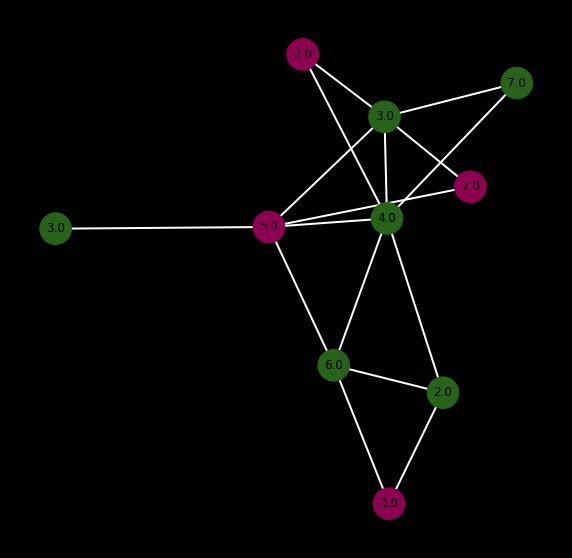

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

nx.draw(
    G, pos, 
    node_size=1000, 
    alpha=1, 
    width=2, 
    ax=ax, 
    edge_color="white", 
    labels={i:np.round(v) for i,v in enumerate(v)},
    node_color=node_mask,
    cmap="PiYG"
)
fig.set_facecolor('black')

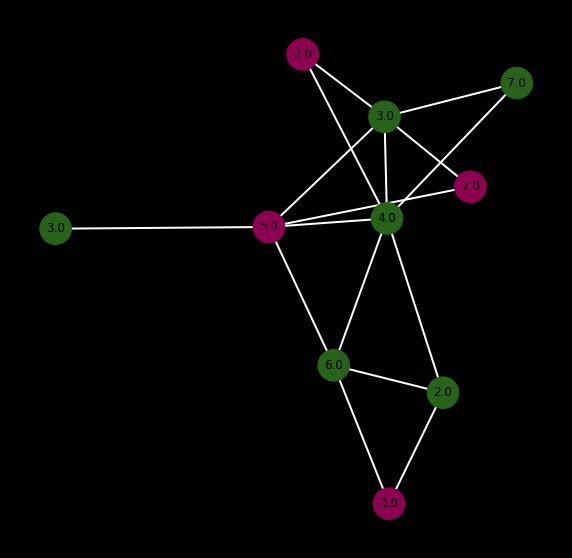

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

for i, v in enumerate(iters):
  ax.clear()

  nx.draw(
      G, pos, 
      node_size=1000, 
      alpha=1, 
      width=2, 
      ax=ax, 
      edge_color="white", 
      labels={i:np.round(v) for i,v in enumerate(v)},
      node_color=node_mask,
      cmap="PiYG"
  )
fig.set_facecolor('black')